In [2]:
import tensorflow as tf
from keras.datasets import mnist
from pyforest import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape([x_train.shape[0],x_train.shape[1]*x_train.shape[1]])
x_test = x_test.reshape([x_test.shape[0],x_test.shape[1]*x_test.shape[1]])
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
num_classes = 10

In [6]:
def create(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(x_train.shape[1],)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

In [35]:
def plot(history,loss,accuracy):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'Testing'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [47]:
def evaluate(model,batch_size=128,epochs=20):
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=True,batch_size=batch_size)
    plot(history,loss,accuracy)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


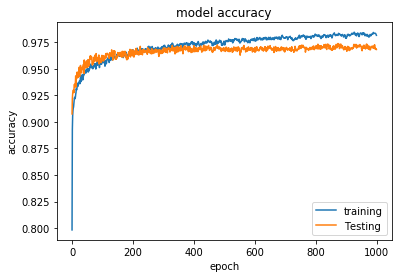


Test loss: 0.0607
Test accuracy: 0.981


In [38]:
for layers in range(1,2):
    model = create([64]*layers)
    evaluate(model,epochs=1000)

In [10]:
def create2(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(x_train.shape[1],)))

    model.add(Dense(units = 64, activation = 'sigmoid'))
    model.add(Dropout(0.8))
    model.add(Dense(units = 256, activation = 'tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

In [11]:
def create3():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = (28,28,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)             

54000/54000 [==============================] - 3s 61us/step - loss: 0.3458 - acc: 0.9012 - val_loss: 0.2109 - val_acc: 0.9432
Epoch 108/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.3459 - acc: 0.9010 - val_loss: 0.2227 - val_acc: 0.9405
Epoch 109/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.3547 - acc: 0.8983 - val_loss: 0.2130 - val_acc: 0.9420
Epoch 110/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.3434 - acc: 0.9023 - val_loss: 0.2128 - val_acc: 0.9440
Epoch 111/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.3490 - acc: 0.9002 - val_loss: 0.2116 - val_acc: 0.9432
Epoch 112/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.3438 - acc: 0.9027 - val_loss: 0.2182 - val_acc: 0.9440
Epoch 113/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.3349 - acc: 0.9056 - val_loss: 0.2025 - val_acc: 0.9473
Epoch 114/5000
54000/54000 [

54000/54000 [==============================] - 3s 62us/step - loss: 0.2864 - acc: 0.9219 - val_loss: 0.1981 - val_acc: 0.9502
Epoch 224/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2882 - acc: 0.9186 - val_loss: 0.2026 - val_acc: 0.9463
Epoch 225/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2905 - acc: 0.9187 - val_loss: 0.2061 - val_acc: 0.9500
Epoch 226/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2929 - acc: 0.9183 - val_loss: 0.1958 - val_acc: 0.9480
Epoch 227/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2968 - acc: 0.9185 - val_loss: 0.1993 - val_acc: 0.9467
Epoch 228/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.2989 - acc: 0.9159 - val_loss: 0.2031 - val_acc: 0.9453
Epoch 229/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.3002 - acc: 0.9161 - val_loss: 0.2004 - val_acc: 0.9453
Epoch 230/5000
54000/54000 [

54000/54000 [==============================] - 3s 62us/step - loss: 0.2500 - acc: 0.9312 - val_loss: 0.1616 - val_acc: 0.9560
Epoch 340/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2470 - acc: 0.9323 - val_loss: 0.1787 - val_acc: 0.9543
Epoch 341/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2563 - acc: 0.9296 - val_loss: 0.1725 - val_acc: 0.9528
Epoch 342/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2521 - acc: 0.9319 - val_loss: 0.1726 - val_acc: 0.9552
Epoch 343/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2551 - acc: 0.9304 - val_loss: 0.1796 - val_acc: 0.9538
Epoch 344/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2568 - acc: 0.9293 - val_loss: 0.1802 - val_acc: 0.9485
Epoch 345/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.2540 - acc: 0.9297 - val_loss: 0.1703 - val_acc: 0.9530
Epoch 346/5000
54000/54000 [

54000/54000 [==============================] - 3s 64us/step - loss: 0.2422 - acc: 0.9328 - val_loss: 0.1670 - val_acc: 0.9568
Epoch 456/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2347 - acc: 0.9358 - val_loss: 0.1806 - val_acc: 0.9530
Epoch 457/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2390 - acc: 0.9340 - val_loss: 0.1650 - val_acc: 0.9548
Epoch 458/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2314 - acc: 0.9361 - val_loss: 0.1891 - val_acc: 0.9487
Epoch 459/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2366 - acc: 0.9360 - val_loss: 0.1681 - val_acc: 0.9563
Epoch 460/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2373 - acc: 0.9339 - val_loss: 0.1793 - val_acc: 0.9568
Epoch 461/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2304 - acc: 0.9359 - val_loss: 0.1739 - val_acc: 0.9542
Epoch 462/5000
54000/54000 [

54000/54000 [==============================] - 3s 63us/step - loss: 0.2248 - acc: 0.9383 - val_loss: 0.1721 - val_acc: 0.9563
Epoch 572/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2173 - acc: 0.9395 - val_loss: 0.1624 - val_acc: 0.9575
Epoch 573/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2214 - acc: 0.9401 - val_loss: 0.1653 - val_acc: 0.9548
Epoch 574/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2180 - acc: 0.9407 - val_loss: 0.1610 - val_acc: 0.9550
Epoch 575/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.2257 - acc: 0.9392 - val_loss: 0.1669 - val_acc: 0.9553
Epoch 576/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2276 - acc: 0.9384 - val_loss: 0.1686 - val_acc: 0.9502
Epoch 577/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2328 - acc: 0.9356 - val_loss: 0.1749 - val_acc: 0.9520
Epoch 578/5000
54000/54000 [

54000/54000 [==============================] - 3s 64us/step - loss: 0.2192 - acc: 0.9393 - val_loss: 0.1689 - val_acc: 0.9555
Epoch 688/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2213 - acc: 0.9388 - val_loss: 0.1700 - val_acc: 0.9537
Epoch 689/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2168 - acc: 0.9406 - val_loss: 0.1610 - val_acc: 0.9537
Epoch 690/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2163 - acc: 0.9403 - val_loss: 0.1588 - val_acc: 0.9565
Epoch 691/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2224 - acc: 0.9401 - val_loss: 0.1743 - val_acc: 0.9522
Epoch 692/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.2157 - acc: 0.9411 - val_loss: 0.1627 - val_acc: 0.9548
Epoch 693/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2168 - acc: 0.9403 - val_loss: 0.1677 - val_acc: 0.9540
Epoch 694/5000
54000/54000 [

54000/54000 [==============================] - 3s 63us/step - loss: 0.2076 - acc: 0.9438 - val_loss: 0.1620 - val_acc: 0.9587
Epoch 804/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2053 - acc: 0.9439 - val_loss: 0.1674 - val_acc: 0.9575
Epoch 805/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1992 - acc: 0.9447 - val_loss: 0.1559 - val_acc: 0.9595
Epoch 806/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.2018 - acc: 0.9442 - val_loss: 0.1609 - val_acc: 0.9582
Epoch 807/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2060 - acc: 0.9434 - val_loss: 0.1605 - val_acc: 0.9587
Epoch 808/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.2019 - acc: 0.9447 - val_loss: 0.1538 - val_acc: 0.9603
Epoch 809/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1991 - acc: 0.9461 - val_loss: 0.1665 - val_acc: 0.9598
Epoch 810/5000
54000/54000 [

54000/54000 [==============================] - 3s 63us/step - loss: 0.1907 - acc: 0.9474 - val_loss: 0.1615 - val_acc: 0.9587
Epoch 920/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1962 - acc: 0.9466 - val_loss: 0.1590 - val_acc: 0.9592
Epoch 921/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1986 - acc: 0.9460 - val_loss: 0.1693 - val_acc: 0.9580
Epoch 922/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2031 - acc: 0.9459 - val_loss: 0.1570 - val_acc: 0.9560
Epoch 923/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1996 - acc: 0.9452 - val_loss: 0.1602 - val_acc: 0.9553
Epoch 924/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.2051 - acc: 0.9454 - val_loss: 0.1731 - val_acc: 0.9570
Epoch 925/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1931 - acc: 0.9471 - val_loss: 0.1496 - val_acc: 0.9598
Epoch 926/5000
54000/54000 [

Epoch 1035/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1938 - acc: 0.9464 - val_loss: 0.1490 - val_acc: 0.9607
Epoch 1036/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1962 - acc: 0.9464 - val_loss: 0.1524 - val_acc: 0.9610
Epoch 1037/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1937 - acc: 0.9468 - val_loss: 0.1486 - val_acc: 0.9607
Epoch 1038/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1923 - acc: 0.9467 - val_loss: 0.1583 - val_acc: 0.9590
Epoch 1039/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1905 - acc: 0.9478 - val_loss: 0.1524 - val_acc: 0.9603
Epoch 1040/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1929 - acc: 0.9479 - val_loss: 0.1438 - val_acc: 0.9648
Epoch 1041/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1871 - acc: 0.9487 - val_loss: 0.1400 - val_acc: 0.9635
Epoch 

Epoch 1150/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1939 - acc: 0.9474 - val_loss: 0.1585 - val_acc: 0.9572
Epoch 1151/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1903 - acc: 0.9495 - val_loss: 0.1606 - val_acc: 0.9587
Epoch 1152/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1897 - acc: 0.9483 - val_loss: 0.1579 - val_acc: 0.9607
Epoch 1153/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1949 - acc: 0.9473 - val_loss: 0.1445 - val_acc: 0.9608
Epoch 1154/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1864 - acc: 0.9495 - val_loss: 0.1503 - val_acc: 0.9605
Epoch 1155/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1889 - acc: 0.9479 - val_loss: 0.1425 - val_acc: 0.9618
Epoch 1156/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1899 - acc: 0.9481 - val_loss: 0.1541 - val_acc: 0.9600
Epoch 

Epoch 1265/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1885 - acc: 0.9481 - val_loss: 0.1486 - val_acc: 0.9602
Epoch 1266/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1813 - acc: 0.9509 - val_loss: 0.1526 - val_acc: 0.9588
Epoch 1267/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1812 - acc: 0.9505 - val_loss: 0.1484 - val_acc: 0.9625
Epoch 1268/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1821 - acc: 0.9512 - val_loss: 0.1519 - val_acc: 0.9578
Epoch 1269/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1795 - acc: 0.9503 - val_loss: 0.1539 - val_acc: 0.9585
Epoch 1270/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1832 - acc: 0.9493 - val_loss: 0.1623 - val_acc: 0.9575
Epoch 1271/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1829 - acc: 0.9502 - val_loss: 0.1531 - val_acc: 0.9570
Epoch 

Epoch 1380/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1794 - acc: 0.9508 - val_loss: 0.1498 - val_acc: 0.9593
Epoch 1381/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1814 - acc: 0.9500 - val_loss: 0.1447 - val_acc: 0.9593
Epoch 1382/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1809 - acc: 0.9504 - val_loss: 0.1496 - val_acc: 0.9618
Epoch 1383/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1843 - acc: 0.9487 - val_loss: 0.1489 - val_acc: 0.9598
Epoch 1384/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1788 - acc: 0.9524 - val_loss: 0.1557 - val_acc: 0.9597
Epoch 1385/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1779 - acc: 0.9522 - val_loss: 0.1475 - val_acc: 0.9612
Epoch 1386/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1726 - acc: 0.9528 - val_loss: 0.1495 - val_acc: 0.9607
Epoch 

Epoch 1495/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1769 - acc: 0.9520 - val_loss: 0.1571 - val_acc: 0.9563
Epoch 1496/5000
54000/54000 [==============================] - 3s 58us/step - loss: 0.1756 - acc: 0.9527 - val_loss: 0.1408 - val_acc: 0.9608
Epoch 1497/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1798 - acc: 0.9517 - val_loss: 0.1469 - val_acc: 0.9605
Epoch 1498/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1781 - acc: 0.9514 - val_loss: 0.1598 - val_acc: 0.9627
Epoch 1499/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1852 - acc: 0.9491 - val_loss: 0.1462 - val_acc: 0.9587
Epoch 1500/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1856 - acc: 0.9498 - val_loss: 0.1517 - val_acc: 0.9595
Epoch 1501/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1789 - acc: 0.9507 - val_loss: 0.1547 - val_acc: 0.9592
Epoch 

Epoch 1610/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1698 - acc: 0.9533 - val_loss: 0.1474 - val_acc: 0.9617
Epoch 1611/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1743 - acc: 0.9523 - val_loss: 0.1507 - val_acc: 0.9597
Epoch 1612/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1740 - acc: 0.9519 - val_loss: 0.1443 - val_acc: 0.9595
Epoch 1613/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1732 - acc: 0.9524 - val_loss: 0.1456 - val_acc: 0.9597
Epoch 1614/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1731 - acc: 0.9521 - val_loss: 0.1522 - val_acc: 0.9590
Epoch 1615/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1704 - acc: 0.9529 - val_loss: 0.1601 - val_acc: 0.9605
Epoch 1616/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1755 - acc: 0.9520 - val_loss: 0.1493 - val_acc: 0.9607
Epoch 

Epoch 1725/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1697 - acc: 0.9527 - val_loss: 0.1480 - val_acc: 0.9557
Epoch 1726/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1671 - acc: 0.9546 - val_loss: 0.1483 - val_acc: 0.9590
Epoch 1727/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1677 - acc: 0.9542 - val_loss: 0.1493 - val_acc: 0.9587
Epoch 1728/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1682 - acc: 0.9536 - val_loss: 0.1473 - val_acc: 0.9598
Epoch 1729/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1716 - acc: 0.9533 - val_loss: 0.1502 - val_acc: 0.9575
Epoch 1730/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1665 - acc: 0.9546 - val_loss: 0.1487 - val_acc: 0.9587
Epoch 1731/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1657 - acc: 0.9553 - val_loss: 0.1461 - val_acc: 0.9602
Epoch 

Epoch 1840/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1675 - acc: 0.9552 - val_loss: 0.1488 - val_acc: 0.9597
Epoch 1841/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1657 - acc: 0.9558 - val_loss: 0.1477 - val_acc: 0.9603
Epoch 1842/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1698 - acc: 0.9545 - val_loss: 0.1506 - val_acc: 0.9577
Epoch 1843/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1610 - acc: 0.9565 - val_loss: 0.1445 - val_acc: 0.9613
Epoch 1844/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1587 - acc: 0.9575 - val_loss: 0.1368 - val_acc: 0.9627
Epoch 1845/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1572 - acc: 0.9566 - val_loss: 0.1375 - val_acc: 0.9610
Epoch 1846/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1610 - acc: 0.9566 - val_loss: 0.1325 - val_acc: 0.9643
Epoch 

Epoch 1955/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1633 - acc: 0.9550 - val_loss: 0.1470 - val_acc: 0.9617
Epoch 1956/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1591 - acc: 0.9566 - val_loss: 0.1434 - val_acc: 0.9610
Epoch 1957/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1619 - acc: 0.9563 - val_loss: 0.1482 - val_acc: 0.9608
Epoch 1958/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1616 - acc: 0.9563 - val_loss: 0.1460 - val_acc: 0.9600
Epoch 1959/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1599 - acc: 0.9570 - val_loss: 0.1376 - val_acc: 0.9612
Epoch 1960/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1564 - acc: 0.9569 - val_loss: 0.1415 - val_acc: 0.9640
Epoch 1961/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1600 - acc: 0.9569 - val_loss: 0.1499 - val_acc: 0.9598
Epoch 

Epoch 2070/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1561 - acc: 0.9573 - val_loss: 0.1395 - val_acc: 0.9645
Epoch 2071/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1569 - acc: 0.9578 - val_loss: 0.1405 - val_acc: 0.9647
Epoch 2072/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1553 - acc: 0.9576 - val_loss: 0.1454 - val_acc: 0.9633
Epoch 2073/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1547 - acc: 0.9586 - val_loss: 0.1396 - val_acc: 0.9630
Epoch 2074/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1548 - acc: 0.9582 - val_loss: 0.1457 - val_acc: 0.9622
Epoch 2075/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1601 - acc: 0.9557 - val_loss: 0.1461 - val_acc: 0.9625
Epoch 2076/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1674 - acc: 0.9545 - val_loss: 0.1436 - val_acc: 0.9630
Epoch 

Epoch 2185/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1609 - acc: 0.9558 - val_loss: 0.1446 - val_acc: 0.9607
Epoch 2186/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1597 - acc: 0.9558 - val_loss: 0.1426 - val_acc: 0.9610
Epoch 2187/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1566 - acc: 0.9572 - val_loss: 0.1503 - val_acc: 0.9582
Epoch 2188/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1560 - acc: 0.9579 - val_loss: 0.1504 - val_acc: 0.9600
Epoch 2189/5000
54000/54000 [==============================] - 3s 55us/step - loss: 0.1572 - acc: 0.9569 - val_loss: 0.1363 - val_acc: 0.9615
Epoch 2190/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1563 - acc: 0.9579 - val_loss: 0.1464 - val_acc: 0.9603
Epoch 2191/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1585 - acc: 0.9571 - val_loss: 0.1510 - val_acc: 0.9605
Epoch 

Epoch 2300/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1569 - acc: 0.9567 - val_loss: 0.1482 - val_acc: 0.9597
Epoch 2301/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1579 - acc: 0.9566 - val_loss: 0.1476 - val_acc: 0.9585
Epoch 2302/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1512 - acc: 0.9584 - val_loss: 0.1448 - val_acc: 0.9580
Epoch 2303/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1559 - acc: 0.9575 - val_loss: 0.1478 - val_acc: 0.9593
Epoch 2304/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1494 - acc: 0.9587 - val_loss: 0.1372 - val_acc: 0.9632
Epoch 2305/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1524 - acc: 0.9585 - val_loss: 0.1527 - val_acc: 0.9605
Epoch 2306/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1532 - acc: 0.9579 - val_loss: 0.1399 - val_acc: 0.9633
Epoch 

Epoch 2415/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1495 - acc: 0.9590 - val_loss: 0.1475 - val_acc: 0.9575
Epoch 2416/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1534 - acc: 0.9576 - val_loss: 0.1509 - val_acc: 0.9577
Epoch 2417/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1545 - acc: 0.9587 - val_loss: 0.1482 - val_acc: 0.9598
Epoch 2418/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1538 - acc: 0.9581 - val_loss: 0.1412 - val_acc: 0.9612
Epoch 2419/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1515 - acc: 0.9587 - val_loss: 0.1415 - val_acc: 0.9600
Epoch 2420/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1577 - acc: 0.9579 - val_loss: 0.1460 - val_acc: 0.9605
Epoch 2421/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1520 - acc: 0.9591 - val_loss: 0.1422 - val_acc: 0.9607
Epoch 

Epoch 2530/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1503 - acc: 0.9588 - val_loss: 0.1398 - val_acc: 0.9622
Epoch 2531/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1510 - acc: 0.9585 - val_loss: 0.1441 - val_acc: 0.9622
Epoch 2532/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1480 - acc: 0.9596 - val_loss: 0.1431 - val_acc: 0.9622
Epoch 2533/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1534 - acc: 0.9576 - val_loss: 0.1469 - val_acc: 0.9593
Epoch 2534/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1571 - acc: 0.9568 - val_loss: 0.1557 - val_acc: 0.9565
Epoch 2535/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1539 - acc: 0.9574 - val_loss: 0.1398 - val_acc: 0.9613
Epoch 2536/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1548 - acc: 0.9579 - val_loss: 0.1383 - val_acc: 0.9618
Epoch 

Epoch 2645/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1474 - acc: 0.9605 - val_loss: 0.1419 - val_acc: 0.9655
Epoch 2646/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1482 - acc: 0.9591 - val_loss: 0.1337 - val_acc: 0.9628
Epoch 2647/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1445 - acc: 0.9603 - val_loss: 0.1382 - val_acc: 0.9645
Epoch 2648/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1510 - acc: 0.9582 - val_loss: 0.1361 - val_acc: 0.9643
Epoch 2649/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1556 - acc: 0.9576 - val_loss: 0.1457 - val_acc: 0.9633
Epoch 2650/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1515 - acc: 0.9591 - val_loss: 0.1430 - val_acc: 0.9638
Epoch 2651/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1574 - acc: 0.9568 - val_loss: 0.1480 - val_acc: 0.9623
Epoch 

Epoch 2760/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1486 - acc: 0.9592 - val_loss: 0.1494 - val_acc: 0.9600
Epoch 2761/5000
54000/54000 [==============================] - 3s 55us/step - loss: 0.1522 - acc: 0.9588 - val_loss: 0.1444 - val_acc: 0.9608
Epoch 2762/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1468 - acc: 0.9603 - val_loss: 0.1396 - val_acc: 0.9610
Epoch 2763/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1424 - acc: 0.9602 - val_loss: 0.1387 - val_acc: 0.9630
Epoch 2764/5000
54000/54000 [==============================] - 3s 55us/step - loss: 0.1502 - acc: 0.9589 - val_loss: 0.1453 - val_acc: 0.9625
Epoch 2765/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1472 - acc: 0.9599 - val_loss: 0.1402 - val_acc: 0.9622
Epoch 2766/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1430 - acc: 0.9617 - val_loss: 0.1510 - val_acc: 0.9608
Epoch 

Epoch 2875/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1445 - acc: 0.9607 - val_loss: 0.1348 - val_acc: 0.9617
Epoch 2876/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1413 - acc: 0.9613 - val_loss: 0.1420 - val_acc: 0.9620
Epoch 2877/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1422 - acc: 0.9604 - val_loss: 0.1436 - val_acc: 0.9638
Epoch 2878/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1464 - acc: 0.9605 - val_loss: 0.1530 - val_acc: 0.9622
Epoch 2879/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1493 - acc: 0.9597 - val_loss: 0.1507 - val_acc: 0.9587
Epoch 2880/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1505 - acc: 0.9591 - val_loss: 0.1517 - val_acc: 0.9587
Epoch 2881/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1479 - acc: 0.9599 - val_loss: 0.1429 - val_acc: 0.9610
Epoch 

Epoch 2990/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1449 - acc: 0.9606 - val_loss: 0.1417 - val_acc: 0.9602
Epoch 2991/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1466 - acc: 0.9608 - val_loss: 0.1459 - val_acc: 0.9593
Epoch 2992/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1495 - acc: 0.9593 - val_loss: 0.1381 - val_acc: 0.9632
Epoch 2993/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1514 - acc: 0.9589 - val_loss: 0.1425 - val_acc: 0.9613
Epoch 2994/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1497 - acc: 0.9584 - val_loss: 0.1419 - val_acc: 0.9620
Epoch 2995/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1484 - acc: 0.9599 - val_loss: 0.1452 - val_acc: 0.9610
Epoch 2996/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1532 - acc: 0.9576 - val_loss: 0.1480 - val_acc: 0.9617
Epoch 

Epoch 3105/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1401 - acc: 0.9625 - val_loss: 0.1448 - val_acc: 0.9633
Epoch 3106/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1379 - acc: 0.9631 - val_loss: 0.1427 - val_acc: 0.9623
Epoch 3107/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1430 - acc: 0.9612 - val_loss: 0.1388 - val_acc: 0.9647
Epoch 3108/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1481 - acc: 0.9597 - val_loss: 0.1437 - val_acc: 0.9647
Epoch 3109/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1423 - acc: 0.9616 - val_loss: 0.1315 - val_acc: 0.9643
Epoch 3110/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1387 - acc: 0.9622 - val_loss: 0.1453 - val_acc: 0.9610
Epoch 3111/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1382 - acc: 0.9619 - val_loss: 0.1425 - val_acc: 0.9595
Epoch 

Epoch 3220/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1421 - acc: 0.9612 - val_loss: 0.1469 - val_acc: 0.9645
Epoch 3221/5000
54000/54000 [==============================] - 3s 58us/step - loss: 0.1443 - acc: 0.9601 - val_loss: 0.1439 - val_acc: 0.9592
Epoch 3222/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1458 - acc: 0.9616 - val_loss: 0.1460 - val_acc: 0.9595
Epoch 3223/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1452 - acc: 0.9611 - val_loss: 0.1498 - val_acc: 0.9590
Epoch 3224/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1420 - acc: 0.9616 - val_loss: 0.1552 - val_acc: 0.9608
Epoch 3225/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1430 - acc: 0.9618 - val_loss: 0.1481 - val_acc: 0.9623
Epoch 3226/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1458 - acc: 0.9611 - val_loss: 0.1429 - val_acc: 0.9608
Epoch 

Epoch 3335/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1389 - acc: 0.9622 - val_loss: 0.1506 - val_acc: 0.9613
Epoch 3336/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1391 - acc: 0.9630 - val_loss: 0.1512 - val_acc: 0.9605
Epoch 3337/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1420 - acc: 0.9620 - val_loss: 0.1518 - val_acc: 0.9587
Epoch 3338/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1445 - acc: 0.9605 - val_loss: 0.1447 - val_acc: 0.9595
Epoch 3339/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1465 - acc: 0.9604 - val_loss: 0.1452 - val_acc: 0.9597
Epoch 3340/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1504 - acc: 0.9590 - val_loss: 0.1480 - val_acc: 0.9597
Epoch 3341/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1420 - acc: 0.9605 - val_loss: 0.1551 - val_acc: 0.9585
Epoch 

Epoch 3450/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1416 - acc: 0.9626 - val_loss: 0.1534 - val_acc: 0.9612
Epoch 3451/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1476 - acc: 0.9612 - val_loss: 0.1484 - val_acc: 0.9615
Epoch 3452/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1458 - acc: 0.9613 - val_loss: 0.1461 - val_acc: 0.9598
Epoch 3453/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1490 - acc: 0.9607 - val_loss: 0.1540 - val_acc: 0.9593
Epoch 3454/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1431 - acc: 0.9621 - val_loss: 0.1513 - val_acc: 0.9620
Epoch 3455/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1352 - acc: 0.9638 - val_loss: 0.1535 - val_acc: 0.9607
Epoch 3456/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1372 - acc: 0.9623 - val_loss: 0.1442 - val_acc: 0.9605
Epoch 

Epoch 3565/5000
54000/54000 [==============================] - 4s 68us/step - loss: 0.1405 - acc: 0.9619 - val_loss: 0.1439 - val_acc: 0.9623
Epoch 3566/5000
54000/54000 [==============================] - 4s 69us/step - loss: 0.1425 - acc: 0.9617 - val_loss: 0.1514 - val_acc: 0.9610
Epoch 3567/5000
54000/54000 [==============================] - 4s 73us/step - loss: 0.1425 - acc: 0.9622 - val_loss: 0.1428 - val_acc: 0.9630
Epoch 3568/5000
54000/54000 [==============================] - 4s 67us/step - loss: 0.1424 - acc: 0.9615 - val_loss: 0.1444 - val_acc: 0.9637
Epoch 3569/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1476 - acc: 0.9607 - val_loss: 0.1492 - val_acc: 0.9615
Epoch 3570/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1466 - acc: 0.9606 - val_loss: 0.1449 - val_acc: 0.9623
Epoch 3571/5000
54000/54000 [==============================] - 4s 71us/step - loss: 0.1441 - acc: 0.9608 - val_loss: 0.1496 - val_acc: 0.9615
Epoch 

Epoch 3680/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1368 - acc: 0.9626 - val_loss: 0.1429 - val_acc: 0.9637
Epoch 3681/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1377 - acc: 0.9626 - val_loss: 0.1471 - val_acc: 0.9647
Epoch 3682/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1363 - acc: 0.9634 - val_loss: 0.1455 - val_acc: 0.9632
Epoch 3683/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1348 - acc: 0.9632 - val_loss: 0.1502 - val_acc: 0.9628
Epoch 3684/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1402 - acc: 0.9622 - val_loss: 0.1475 - val_acc: 0.9613
Epoch 3685/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1398 - acc: 0.9619 - val_loss: 0.1501 - val_acc: 0.9610
Epoch 3686/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1452 - acc: 0.9615 - val_loss: 0.1454 - val_acc: 0.9628
Epoch 

Epoch 3795/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1346 - acc: 0.9639 - val_loss: 0.1357 - val_acc: 0.9647
Epoch 3796/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1335 - acc: 0.9640 - val_loss: 0.1348 - val_acc: 0.9648
Epoch 3797/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1364 - acc: 0.9631 - val_loss: 0.1306 - val_acc: 0.9653
Epoch 3798/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1306 - acc: 0.9651 - val_loss: 0.1324 - val_acc: 0.9648
Epoch 3799/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1337 - acc: 0.9640 - val_loss: 0.1312 - val_acc: 0.9647
Epoch 3800/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1341 - acc: 0.9639 - val_loss: 0.1372 - val_acc: 0.9640
Epoch 3801/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1334 - acc: 0.9637 - val_loss: 0.1412 - val_acc: 0.9635
Epoch 

Epoch 3910/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1389 - acc: 0.9630 - val_loss: 0.1541 - val_acc: 0.9588
Epoch 3911/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1341 - acc: 0.9634 - val_loss: 0.1538 - val_acc: 0.9600
Epoch 3912/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1354 - acc: 0.9631 - val_loss: 0.1543 - val_acc: 0.9613
Epoch 3913/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1389 - acc: 0.9623 - val_loss: 0.1507 - val_acc: 0.9610
Epoch 3914/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1366 - acc: 0.9637 - val_loss: 0.1540 - val_acc: 0.9612
Epoch 3915/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1344 - acc: 0.9632 - val_loss: 0.1534 - val_acc: 0.9620
Epoch 3916/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1306 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9625
Epoch 

Epoch 4025/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1402 - acc: 0.9619 - val_loss: 0.1431 - val_acc: 0.9612
Epoch 4026/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1392 - acc: 0.9624 - val_loss: 0.1513 - val_acc: 0.9600
Epoch 4027/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1324 - acc: 0.9647 - val_loss: 0.1460 - val_acc: 0.9632
Epoch 4028/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1372 - acc: 0.9636 - val_loss: 0.1422 - val_acc: 0.9595
Epoch 4029/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1413 - acc: 0.9626 - val_loss: 0.1406 - val_acc: 0.9623
Epoch 4030/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1404 - acc: 0.9625 - val_loss: 0.1416 - val_acc: 0.9635
Epoch 4031/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1336 - acc: 0.9646 - val_loss: 0.1533 - val_acc: 0.9600
Epoch 

Epoch 4140/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1329 - acc: 0.9636 - val_loss: 0.1439 - val_acc: 0.9628
Epoch 4141/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1319 - acc: 0.9638 - val_loss: 0.1435 - val_acc: 0.9620
Epoch 4142/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1278 - acc: 0.9656 - val_loss: 0.1441 - val_acc: 0.9638
Epoch 4143/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1308 - acc: 0.9652 - val_loss: 0.1426 - val_acc: 0.9623
Epoch 4144/5000
54000/54000 [==============================] - 3s 59us/step - loss: 0.1352 - acc: 0.9636 - val_loss: 0.1521 - val_acc: 0.9595
Epoch 4145/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1301 - acc: 0.9649 - val_loss: 0.1437 - val_acc: 0.9627
Epoch 4146/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1274 - acc: 0.9653 - val_loss: 0.1364 - val_acc: 0.9630
Epoch 

Epoch 4255/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1288 - acc: 0.9643 - val_loss: 0.1396 - val_acc: 0.9623
Epoch 4256/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1297 - acc: 0.9655 - val_loss: 0.1342 - val_acc: 0.9625
Epoch 4257/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1324 - acc: 0.9639 - val_loss: 0.1487 - val_acc: 0.9603
Epoch 4258/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1347 - acc: 0.9627 - val_loss: 0.1560 - val_acc: 0.9592
Epoch 4259/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1343 - acc: 0.9636 - val_loss: 0.1420 - val_acc: 0.9628
Epoch 4260/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1343 - acc: 0.9637 - val_loss: 0.1388 - val_acc: 0.9628
Epoch 4261/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1357 - acc: 0.9626 - val_loss: 0.1488 - val_acc: 0.9605
Epoch 

Epoch 4370/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1292 - acc: 0.9646 - val_loss: 0.1453 - val_acc: 0.9638
Epoch 4371/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1283 - acc: 0.9652 - val_loss: 0.1450 - val_acc: 0.9633
Epoch 4372/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1287 - acc: 0.9651 - val_loss: 0.1468 - val_acc: 0.9608
Epoch 4373/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1284 - acc: 0.9655 - val_loss: 0.1494 - val_acc: 0.9622
Epoch 4374/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1292 - acc: 0.9653 - val_loss: 0.1467 - val_acc: 0.9615
Epoch 4375/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1317 - acc: 0.9650 - val_loss: 0.1396 - val_acc: 0.9635
Epoch 4376/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1274 - acc: 0.9648 - val_loss: 0.1450 - val_acc: 0.9623
Epoch 

Epoch 4485/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1303 - acc: 0.9649 - val_loss: 0.1423 - val_acc: 0.9600
Epoch 4486/5000
54000/54000 [==============================] - 3s 58us/step - loss: 0.1316 - acc: 0.9644 - val_loss: 0.1456 - val_acc: 0.9603
Epoch 4487/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1298 - acc: 0.9649 - val_loss: 0.1430 - val_acc: 0.9632
Epoch 4488/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1294 - acc: 0.9660 - val_loss: 0.1474 - val_acc: 0.9623
Epoch 4489/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1276 - acc: 0.9656 - val_loss: 0.1491 - val_acc: 0.9610
Epoch 4490/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1295 - acc: 0.9649 - val_loss: 0.1455 - val_acc: 0.9630
Epoch 4491/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1342 - acc: 0.9643 - val_loss: 0.1482 - val_acc: 0.9600
Epoch 

Epoch 4600/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1320 - acc: 0.9645 - val_loss: 0.1418 - val_acc: 0.9632
Epoch 4601/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1318 - acc: 0.9638 - val_loss: 0.1436 - val_acc: 0.9627
Epoch 4602/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1298 - acc: 0.9651 - val_loss: 0.1365 - val_acc: 0.9638
Epoch 4603/5000
54000/54000 [==============================] - 3s 60us/step - loss: 0.1286 - acc: 0.9650 - val_loss: 0.1392 - val_acc: 0.9638
Epoch 4604/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1321 - acc: 0.9648 - val_loss: 0.1386 - val_acc: 0.9635
Epoch 4605/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1289 - acc: 0.9656 - val_loss: 0.1391 - val_acc: 0.9642
Epoch 4606/5000
54000/54000 [==============================] - 3s 64us/step - loss: 0.1256 - acc: 0.9660 - val_loss: 0.1407 - val_acc: 0.9638
Epoch 

Epoch 4715/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1248 - acc: 0.9663 - val_loss: 0.1468 - val_acc: 0.9608
Epoch 4716/5000
54000/54000 [==============================] - 3s 63us/step - loss: 0.1286 - acc: 0.9658 - val_loss: 0.1440 - val_acc: 0.9610
Epoch 4717/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1227 - acc: 0.9655 - val_loss: 0.1505 - val_acc: 0.9613
Epoch 4718/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1285 - acc: 0.9653 - val_loss: 0.1494 - val_acc: 0.9613
Epoch 4719/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1282 - acc: 0.9649 - val_loss: 0.1504 - val_acc: 0.9632
Epoch 4720/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1275 - acc: 0.9653 - val_loss: 0.1478 - val_acc: 0.9605
Epoch 4721/5000
54000/54000 [==============================] - 3s 61us/step - loss: 0.1299 - acc: 0.9651 - val_loss: 0.1523 - val_acc: 0.9615
Epoch 

Epoch 4830/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1212 - acc: 0.9668 - val_loss: 0.1469 - val_acc: 0.9637
Epoch 4831/5000
54000/54000 [==============================] - 3s 65us/step - loss: 0.1249 - acc: 0.9660 - val_loss: 0.1506 - val_acc: 0.9612
Epoch 4832/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1287 - acc: 0.9647 - val_loss: 0.1464 - val_acc: 0.9617
Epoch 4833/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1321 - acc: 0.9643 - val_loss: 0.1508 - val_acc: 0.9610
Epoch 4834/5000
54000/54000 [==============================] - 3s 62us/step - loss: 0.1300 - acc: 0.9651 - val_loss: 0.1546 - val_acc: 0.9610
Epoch 4835/5000
54000/54000 [==============================] - 4s 65us/step - loss: 0.1311 - acc: 0.9648 - val_loss: 0.1597 - val_acc: 0.9597
Epoch 4836/5000
54000/54000 [==============================] - 4s 66us/step - loss: 0.1297 - acc: 0.9653 - val_loss: 0.1600 - val_acc: 0.9593
Epoch 

Epoch 4945/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1290 - acc: 0.9651 - val_loss: 0.1491 - val_acc: 0.9620
Epoch 4946/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1280 - acc: 0.9661 - val_loss: 0.1592 - val_acc: 0.9612
Epoch 4947/5000
54000/54000 [==============================] - 3s 57us/step - loss: 0.1303 - acc: 0.9647 - val_loss: 0.1614 - val_acc: 0.9613
Epoch 4948/5000
54000/54000 [==============================] - 3s 58us/step - loss: 0.1286 - acc: 0.9655 - val_loss: 0.1471 - val_acc: 0.9625
Epoch 4949/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1346 - acc: 0.9648 - val_loss: 0.1614 - val_acc: 0.9612
Epoch 4950/5000
54000/54000 [==============================] - 3s 56us/step - loss: 0.1284 - acc: 0.9651 - val_loss: 0.1508 - val_acc: 0.9608
Epoch 4951/5000
54000/54000 [==============================] - 3s 55us/step - loss: 0.1254 - acc: 0.9661 - val_loss: 0.1540 - val_acc: 0.9620
Epoch 

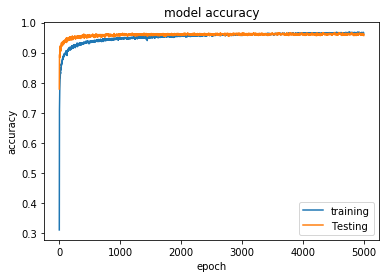


Test loss: 0.181
Test accuracy: 0.952


In [48]:
model2 = create2([64])
evaluate(model2,epochs=5000)

In [18]:
x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)
model3 = create3()
evaluate(model3)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

<Figure size 640x480 with 1 Axes>


Test loss: 0.0397
Test accuracy: 0.99


In [24]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 23us/step


[0.21107335761785506, 0.9342]

In [27]:
model2.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 37us/step


[0.37563388578891754, 0.8948]

In [19]:
model3.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 104us/step


[0.039691972187791906, 0.9901]

# Testing my own Handwritten Digits

In [19]:
import cv2
from PIL import Image

In [20]:
a = ['d/1.jpg','d/2.jpg','d/4.jpg','d/5.jpg','d/6.jpg']

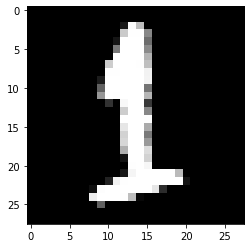

Predicted Digit [1]


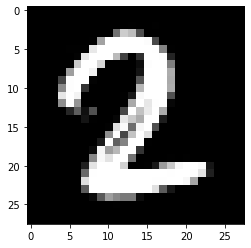

Predicted Digit [2]


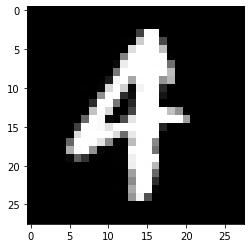

Predicted Digit [4]


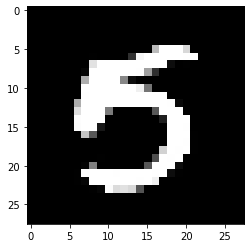

Predicted Digit [5]


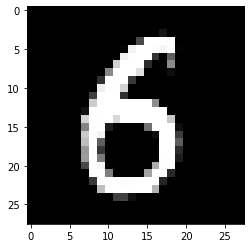

Predicted Digit [5]


In [39]:
for i in a:
    img = Image.open(i).convert("L")
    im2arr = np.array(img)
    im2arr = 255 - im2arr
    im2arr = cv2.resize(im2arr,(28,28))
    plt.imshow(im2arr,cmap = 'gray')
    plt.show()
    im2arr = im2arr.reshape(1,784)
    y_pred = model.predict_classes(im2arr)
    print('Predicted Digit' ,y_pred)